In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('ggplot')

In [3]:
trainData = pd.read_csv('../data/train.csv')
trainData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
testData = pd.read_csv('../data/test.csv')
testData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
trainData = trainData.drop(['id'], axis = 1)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [6]:
testData = testData.drop(['id'], axis = 1)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 9.7+ MB


In [7]:
#Checking for null values
print(trainData.isnull().sum())
print(" ")
print(testData.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
 
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


No value is null

<AxesSubplot:ylabel='Response'>

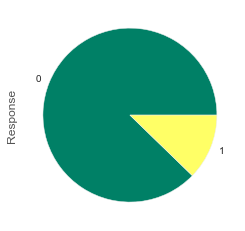

In [8]:
trainData["Response"].value_counts().plot.pie(colormap = "summer")

In [9]:
#Getting data in numerical entities

###Gender
def Gender(gen):
    if gen == 'Female':
        return 1
    else:
        return 0
trainData['Gender'] = trainData['Gender'].apply(Gender)
testData['Gender'] = testData['Gender'].apply(Gender)

###Vehicle Age
def VehicleAge(age):
    if age == '< 1 Year':
        return 0
    elif age == '1-2 Year':
        return 1
    else:
        return 2
trainData['Vehicle_Age'] = trainData['Vehicle_Age'].apply(VehicleAge)    
testData['Vehicle_Age'] = testData['Vehicle_Age'].apply(VehicleAge)    

###Vehicle Damage
def VehicleDamage(damage):
    if damage == 'Yes':
        return 1
    else:
        return 0
trainData['Vehicle_Damage'] = trainData['Vehicle_Damage'].apply(VehicleDamage)
testData['Vehicle_Damage'] = testData['Vehicle_Damage'].apply(VehicleDamage)


In [10]:
trainData = trainData.drop(['Driving_License'], axis = 1)
trainData.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0


In [11]:
testData= testData.drop(['Driving_License'], axis=1)
testData.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,11.0,1,0,0,35786.0,152.0,53
1,0,40,28.0,0,1,1,33762.0,7.0,111
2,0,47,28.0,0,1,1,40050.0,124.0,199
3,0,24,27.0,1,0,1,37356.0,152.0,187
4,0,27,28.0,1,0,0,59097.0,152.0,297


<AxesSubplot:>

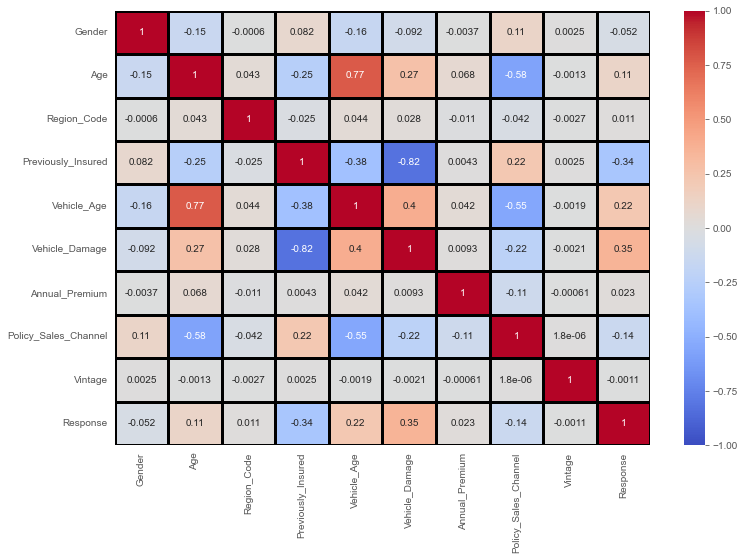

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(trainData.corr(), annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score,recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.utils.multiclass import type_of_target

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

In [14]:
numCols = ['Age','Region_Code', 'Policy_Sales_Channel', 'Vintage' ]
scaler = StandardScaler()
trainData[numCols] = scaler.fit_transform(trainData[numCols])

In [15]:
scalerM = MinMaxScaler()
trainData[["Annual_Premium"]] = scalerM.fit_transform(trainData[["Annual_Premium"]])

In [16]:
x = trainData.drop(['Response'], axis = 1)
y = trainData['Response']

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.4, random_state = 42 )

In [18]:
model = KNeighborsClassifier(n_neighbors = 11, weights = "uniform")
model.fit(xTrain,yTrain)
y_pred = model.predict(xTest)
accuracy_score(yTest, y_pred)

0.8668953845346488

In [19]:
roc_auc_score(yTest, y_pred, average = 'weighted')

0.5402534603799019